Ha: Work done so far: change all data types, drop some corrupted rows with at start_time and end_time
successfully fill in null values( with k means)
Next step: - engineering new feature, idle_time
           -visualising our data
We can also start working on the report with the part "Understanding data" afterwards.


In [1]:
# import all relevant libraries
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
import seaborn as sns

sns.set()
sns.set_style("white")
sns.set_palette("GnBu_d")

# also import these "new" libraries
# Note: you may have to download an add them to your environment (using e.g. 'conda install -c conda-forge folium')
import folium
from folium import plugins
from folium.plugins import HeatMap
from datetime import datetime  # for working with times objects
from datetime import timedelta  # for working with times objects
import math
import random

## Step 1: Import Data 

In [4]:
# load csv file and set the index column by 0
df = pd.read_csv("baywheels_2019", encoding="ISO-8859-1", index_col=0)
df.head(20)

C:\Users\LINHKHANHSPC\AppData\Local\Temp\ipykernel_2552\1972288972.py:2: DtypeWarning: Columns (3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("baywheels_2019", encoding="ISO-8859-1", index_col=0)


,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id
0,2019-10-28 09:46:47,2019-10-28 09:51:05,50.0,37.780526,-122.390288,453.0,37.777934,-122.396973,12424.0
1,2019-08-10 19:31:02,2019-08-10 19:35:05,285.0,37.783521,-122.431158,74.0,37.776435,-122.426244,1718.0
2,2019-05-27 13:18:58,2019-05-27 13:46:37,10.0,37.795393,-122.40477,399.0,37.802636,-122.436289,608.0
3,2019-07-24 22:47:58,2019-07-24 22:52:48,106.0,37.763242,-122.430675,72.0,37.772406,-122.43565,551642.0
4,2019-04-28 17:26:22,2019-04-28 17:31:54,80.0,37.775235,-122.397437,50.0,37.780526,-122.390288,1103.0
5,2019-04-17 19:39:05,2019-04-17 19:49:26,100.0,37.7671,-122.410662,74.0,37.776435,-122.426244,1473.0
6,2019-02-26 08:11:01,2019-02-26 08:22:58,67.0,37.776639,-122.395526,8.0,37.799953,-122.398525,4984.0
7,2019-02-02 09:23:15,2019-02-02 09:34:20,44.0,37.781074,-122.411738,55.0,37.777053,-122.429558,2666.0
8,2019-05-07 12:08:01,2019-05-07 12:12:00,9.0,37.798572,-122.400869,6.0,37.80477,-122.403234,1961.0
9,2019-09-04 21:58:19,2019-09-04 22:09:07,86.0,37.769305,-122.426826,39.0,37.778999,-122.436861,9717.0


In [5]:
# take a look at the data types and general information
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 2507003 entries, 0 to 2507002
Data columns (total 9 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   start_time         object
 1   end_time           object
 2   start_station_id   object
 3   start_station_lat  object
 4   start_station_lon  object
 5   end_station_id     object
 6   end_station_lat    object
 7   end_station_lon    object
 8   bike_id            object
dtypes: object(9)
memory usage: 191.3+ MB
None
       start_time end_time  start_station_id  start_station_lat   
count     2507003  2507003         2426269.0       2.507003e+06  \
unique    2304544  2303004             867.0       7.712800e+04   
top       Failure  Failure              58.0       3.777662e+01   
freq           10       10           34467.0       3.446700e+04   

        start_station_lon  end_station_id  end_station_lat  end_station_lon   
count        2.507003e+06       2424101.0     2.507003e+06     2.507003e+06  \
unique     

We can see that the data types are not specified which makes it hard to work with. After inspecting the dataset, there are rows containing "Failure" so we want to remove all of these. 

In [7]:
# create a new data frame that containts all failure rows from dft
rent_failure = df["start_time"].str.contains("Failure")
data_failure = df[rent_failure]
data_failure

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id
381556,Failure,Failure,<NA>,NaN,NaN,<NA>,NaN,NaN,<NA>
485428,Failure,Failure,<NA>,NaN,NaN,<NA>,NaN,NaN,<NA>
621119,Failure,Failure,<NA>,NaN,NaN,<NA>,NaN,NaN,<NA>
713198,Failure,Failure,<NA>,NaN,NaN,<NA>,NaN,NaN,<NA>
1150787,Failure,Failure,<NA>,NaN,NaN,<NA>,NaN,NaN,<NA>
1558857,Failure,Failure,<NA>,NaN,NaN,<NA>,NaN,NaN,<NA>
1676023,Failure,Failure,<NA>,NaN,NaN,<NA>,NaN,NaN,<NA>
1697405,Failure,Failure,<NA>,NaN,NaN,<NA>,NaN,NaN,<NA>
1999499,Failure,Failure,<NA>,NaN,NaN,<NA>,NaN,NaN,<NA>
2249494,Failure,Failure,<NA>,NaN,NaN,<NA>,NaN,NaN,<NA>


In [8]:
# remove all rows that match failure rows
df = df.drop(data_failure.index, axis=0)

## Step 2: Transform Data

Now we have to convert every feature to the correct data types in order to to make calculations and analysis.

In [9]:
df["bike_id"]= pd.to_numeric(df["bike_id"], errors='coerce')
df["bike_id"]= df["bike_id"].astype('Int64')
df["start_station_lat"]= pd.to_numeric(df["start_station_lat"], errors='coerce')
df["start_station_lon"]=pd.to_numeric(df["start_station_lon"], errors='coerce')
df['start_station_lat'] = df['start_station_lat'].round(6)
df['start_station_lon'] = df['start_station_lon'].round(6)
df["end_station_lat"]=pd.to_numeric(df["end_station_lat"], errors='coerce')
df["end_station_lon"]=pd.to_numeric(df["end_station_lon"], errors='coerce')
df["start_station_id"] =pd.to_numeric(df["start_station_id"], errors='coerce')
df["start_station_id"]= df["start_station_id"].astype("Int64")
df["end_station_id"] =pd.to_numeric(df["end_station_id"], errors='coerce')
df["end_station_id"]= df["end_station_id"].astype("Int64")

df["start_time"]= pd.to_datetime(df["start_time"],format ='%Y-%m-%d %H:%M:%S')
df["end_time"]= pd.to_datetime(df["end_time"],format ='%Y-%m-%d %H:%M:%S')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2506993 entries, 0 to 2507002
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   start_time         datetime64[ns]
 1   end_time           datetime64[ns]
 2   start_station_id   Int64         
 3   start_station_lat  float64       
 4   start_station_lon  float64       
 5   end_station_id     Int64         
 6   end_station_lat    float64       
 7   end_station_lon    float64       
 8   bike_id            Int64         
dtypes: Int64(3), datetime64[ns](2), float64(4)
memory usage: 198.4 MB
None


In [12]:
# After transforming the data we check if there are any non-defined values.
df.isna().sum()

start_time               0
end_time                 0
start_station_id     80734
start_station_lat        0
start_station_lon        0
end_station_id       82902
end_station_lat          0
end_station_lon          0
bike_id                  1
dtype: int64

In [15]:
df[df["start_station_id"].isnull() | df["end_station_id"].isnull()]

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id
1956039,2019-02-23 17:57:52,2019-02-23 18:26:20,<NA>,37.410000,-121.950000,<NA>,37.410000,-121.950000,3975
2298364,2019-02-27 14:06:51,2019-02-27 14:13:31,<NA>,37.410000,-121.950000,<NA>,37.410000,-121.960000,3975
193315,2019-03-11 20:46:18,2019-03-11 20:48:55,<NA>,37.420000,-121.940000,<NA>,37.420000,-121.940000,3975
826239,2019-03-11 12:05:53,2019-03-11 12:09:38,<NA>,37.420000,-121.940000,<NA>,37.420000,-121.940000,3975
1321395,2019-03-12 08:44:08,2019-03-12 08:49:39,<NA>,37.420000,-121.940000,<NA>,37.410000,-121.950000,3975
...,...,...,...,...,...,...,...,...,...
813813,2019-12-08 01:15:35,2019-12-08 01:16:41,<NA>,37.775925,-122.392526,<NA>,37.776050,-122.392549,999941
1425376,2019-12-03 10:24:02,2019-12-03 10:25:51,<NA>,37.775769,-122.392548,<NA>,37.775718,-122.392675,999941
1434984,2019-12-27 12:51:19,2019-12-27 12:52:25,<NA>,37.775912,-122.392578,<NA>,37.775857,-122.392584,999941
1274746,2019-12-03 11:05:06,2019-12-03 11:07:02,<NA>,37.775776,-122.392644,<NA>,37.775815,-122.392665,999941


## Step 3: Handle missing and incorrect values

Firstly, we noticed that there are entries which have invalid start or end time (not in 2019). Since the amount of it is less than 5%, we can remove these.

In [112]:
# drop some rows with start_time in 2013
df.drop(df[(df['start_time'].dt.year < 2018) | (df['start_time'].dt.year > 2020)].index, inplace=True)
df

,Unnamed: 0,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id
1440582,1532016,2019-01-01 00:07:10,2019-01-01 00:10:57,245,37.870139,-122.268422,247,37.867789,-122.265896,5117
546769,1493582,2019-01-01 00:08:39,2019-01-01 00:38:06,16,37.794130,-122.394430,115,37.765026,-122.398773,1705
1292126,1738769,2019-01-01 00:09:56,2019-01-01 00:12:58,269,37.862320,-122.258801,240,37.866043,-122.258804,4621
1337565,1095647,2019-01-01 00:11:03,2019-01-01 00:20:29,269,37.862320,-122.258801,243,37.869360,-122.254337,4783
1368339,1863188,2019-01-01 00:14:48,2019-01-01 00:26:38,163,37.797320,-122.265320,159,37.816060,-122.278244,4892
...,...,...,...,...,...,...,...,...,...,...
2202053,1703801,2019-12-31 23:56:34,2020-01-01 00:09:36,23,37.791464,-122.391034,23,37.791464,-122.391034,11683
2129858,589356,2019-12-31 23:56:40,2020-01-01 00:09:41,23,37.791464,-122.391034,23,37.791464,-122.391034,11020
2343211,546182,2019-12-31 23:57:01,2020-01-01 00:00:07,43,37.778768,-122.415929,75,37.773793,-122.421239,12734
2176555,729949,2019-12-31 23:59:37,2020-01-01 00:17:08,473,37.309014,-121.900011,294,37.327581,-121.884559,11448


Secondly, there are missing values in <b>start_station_id</b> and <b>end_station_id</b> column. We tried different approaches to handle these values:
- Using <b>k-means clustering algorithm</b> to assign an ID to the given longtitudes and latitudes.

- <b>Dropping</b> all rows with missing values.

The cost of performing the first method was higher than the latter and the amount of missing values take up less than 5%, so we decided to opt for the second approach.

In [35]:
df.drop(df[df['start_station_id'].isnull() | df['end_station_id'].isnull()].index, inplace = True)

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'start_time'}>,
        <AxesSubplot:title={'center':'end_time'}>],
       [<AxesSubplot:title={'center':'start_station_id'}>,
        <AxesSubplot:title={'center':'start_station_lat'}>,
        <AxesSubplot:title={'center':'start_station_lon'}>],
       [<AxesSubplot:title={'center':'end_station_id'}>,
        <AxesSubplot:title={'center':'end_station_lat'}>,
        <AxesSubplot:title={'center':'end_station_lon'}>],
       [<AxesSubplot:title={'center':'bike_id'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

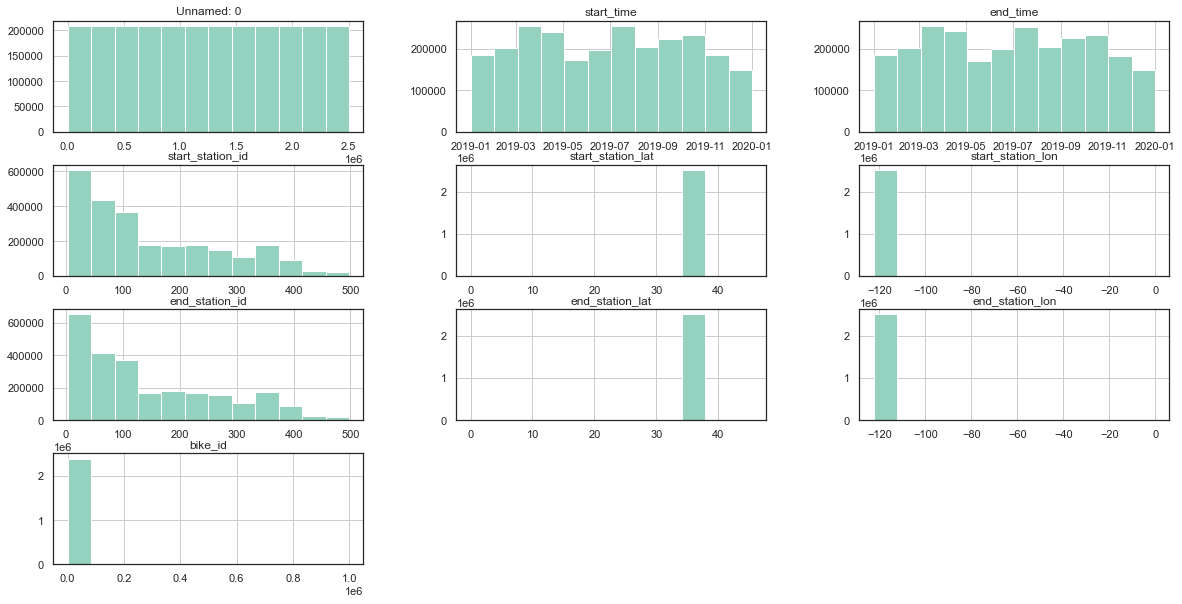

In [114]:
bikeRen.hist(bins = 12, figsize = (20, 10))

Something can be interpreted from the above graph:
the stations with the station_id under 150 are more occupied than the rest, maybe they are located within city center?




Now let's try to calculate idle time
2 approach: idle time group by bike_id, and idle time group by station_id

the first one is easier to implement 

Let's go with the first approach first


In [40]:
start_stations =df.loc[:,['start_time', 'start_station_id', 'bike_id']]
start_stations["rented"] = 0
start_stations.rename(columns = {"start_time": "timestamp", 'start_station_id': "station_id"}, inplace=True)
start_stations


,timestamp,station_id,bike_id,rented
820394,2013-06-11 20:19:55,436,1,0
315417,2013-04-06 18:24:01,92,1,0
1052707,2013-06-19 21:12:10,195,1,0
1590064,2013-05-03 11:09:57,395,1,0
1971590,2013-07-13 14:21:22,231,1,0
...,...,...,...,...
1418972,2019-07-25 08:34:53,67,998430,0
2233029,2019-07-24 05:45:39,345,998430,0
1276395,2019-07-24 12:37:23,17,998430,0
693289,2019-12-19 08:48:50,81,998430,0


Now we want to try the second approach.

In [42]:
end_stations =df.loc[:,['end_time', 'end_station_id', 'bike_id']]
end_stations["rented"] = 1
end_stations.rename(columns={"end_time": "timestamp", 'end_station_id': "station_id"}, inplace=True)
end_stations

,timestamp,station_id,bike_id,rented
820394,2019-01-30 14:08:55,398,1,1
315417,2019-02-11 10:30:26,258,1,1
1052707,2019-02-01 11:24:22,453,1,1
1590064,2019-05-23 20:25:53,424,1,1
1971590,2019-08-13 09:58:35,195,1,1
...,...,...,...,...
1418972,2019-07-25 08:47:51,58,998430,1
2233029,2019-07-24 05:52:04,33,998430,1
1276395,2019-07-24 12:55:15,104,998430,1
693289,2019-12-19 08:55:58,349,998430,1


In [48]:
df_merged = pd.concat([start_stations, end_stations], axis = 0)
df_merged.sort_values(by = ["station_id", "timestamp"])

,timestamp,station_id,bike_id,rented
1345722,2019-01-01 01:05:01,3,5426,1
68168,2019-01-01 01:11:19,3,5481,0
166432,2019-01-01 01:23:27,3,5216,0
1580897,2019-01-01 01:40:07,3,5426,0
413967,2019-01-01 05:03:40,3,5191,0
...,...,...,...,...
1259133,2019-12-30 14:29:13,498,10962,1
1143090,2019-12-30 14:29:36,498,10962,0
1143090,2019-12-30 14:36:08,498,10962,1
2028999,2019-12-31 11:29:00,498,10962,0


In [85]:
# test for station with ID 3
station_3 = df_merged[df_merged["station_id"] == 3]
station_3 = station_3.sort_values(by = "timestamp", ascending=True)
station_3 = station_3.reset_index()
station_3 = station_3.drop(['index'], axis = 1)
station_3

,timestamp,station_id,bike_id,rented
0,2019-01-01 01:05:01,3,5426,1
1,2019-01-01 01:11:19,3,5481,0
2,2019-01-01 01:23:27,3,5216,0
3,2019-01-01 01:40:07,3,5426,0
4,2019-01-01 05:03:40,3,5191,0
...,...,...,...,...
71257,2019-12-31 21:03:43,3,9614,1
71258,2019-12-31 21:04:24,3,11437,1
71259,2019-12-31 22:03:58,3,2917,0
71260,2019-12-31 22:51:05,3,10219,0


In [84]:

station_3['prev_row'] = station_3.groupby("station_id")['timestamp'].shift(1)
station_3['idle_time'] = 0
station_3

,timestamp,station_id,bike_id,rented,prev_row,idle_time
0,2019-01-01 01:05:01,3,5426,1,NaT,0
1,2019-01-01 01:11:19,3,5481,0,2019-01-01 01:05:01,0
2,2019-01-01 01:23:27,3,5216,0,2019-01-01 01:11:19,0
3,2019-01-01 01:40:07,3,5426,0,2019-01-01 01:23:27,0
4,2019-01-01 05:03:40,3,5191,0,2019-01-01 01:40:07,0
...,...,...,...,...,...,...
71257,2019-12-31 21:03:43,3,9614,1,2019-12-31 20:59:03,0
71258,2019-12-31 21:04:24,3,11437,1,2019-12-31 21:03:43,0
71259,2019-12-31 22:03:58,3,2917,0,2019-12-31 21:04:24,0
71260,2019-12-31 22:51:05,3,10219,0,2019-12-31 22:03:58,0


In [115]:

# Calculate idle time by subtracting the start time of entry (i+1) from the end time of entry (i)
bikeRen.sort_values(by='start_time',inplace= True)

bikeRen['bike_idle_time'] = bikeRen['start_time'] - bikeRen.groupby('bike_id')['end_time'].shift(1)


bikeRen.head(10)
bikeRen.sort_values(by='bike_id',inplace= False)


,Unnamed: 0,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,bike_idle_time
5,1153682,2019-11-28 15:02:41,2019-11-28 15:08:10,408,37.718027,-122.387862,408,37.718027,-122.387862,4,0 days 00:00:45
6,2482847,2019-11-28 14:59:39,2019-11-28 15:01:56,408,37.718027,-122.387862,408,37.718027,-122.387862,4,NaT
212,754154,2019-04-19 10:32:07,2019-04-19 10:39:13,21,37.789625,-122.400811,36,37.783830,-122.398870,11,0 days 00:56:29
18,1630246,2019-01-29 19:08:44,2019-01-29 19:30:58,350,37.771431,-122.405787,355,37.755367,-122.388795,11,0 days 10:16:50
177,1142636,2019-03-10 18:27:14,2019-03-10 18:30:29,115,37.765026,-122.398773,114,37.764478,-122.402570,11,0 days 00:06:22
...,...,...,...,...,...,...,...,...,...,...,...
2506973,117713,2019-12-03 15:15:09,2019-12-03 15:18:39,423,37.775696,-122.392793,344,37.775760,-122.392793,999941,0 days 00:17:40
2506981,1465980,2019-12-19 16:50:20,2019-12-19 16:52:07,423,37.775904,-122.392551,344,37.775879,-122.392585,999941,8 days 01:20:21
2506980,17936,2019-12-03 14:38:15,2019-12-03 14:39:39,423,37.775811,-122.392612,344,37.775784,-122.392640,999941,0 days 00:04:46
2506976,1309502,2019-12-03 15:27:35,2019-12-03 15:30:01,423,37.775975,-122.392381,344,37.775914,-122.392392,999941,0 days 00:08:56


I dont know if its because the fill in was not accurate but sometime the end_station of the entry i doesnt match the start_station of the entry i+1

We kinda need it to match to calculate how long was a bike x was parked in station y until x get booked again.
well with it telepathing to another station it doesnt make much sense.
we could, however, argue that there might be missing entries inbetween.

In [121]:
group_11 =bikeRen.groupby('bike_id').get_group(11)

group_11.sort_values(by='start_time')



,Unnamed: 0,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,bike_idle_time
164,84754,2019-01-02 20:15:13,2019-01-02 20:40:58,155,37.840521,-122.293528,200,37.800214,-122.253810,11,0 days 00:00:00
181,63987,2019-01-03 06:18:35,2019-01-03 06:24:06,200,37.800214,-122.253810,196,37.808894,-122.256460,11,0 days 09:37:37
185,576118,2019-01-03 08:02:38,2019-01-03 08:08:34,196,37.808894,-122.256460,182,37.809013,-122.268247,11,0 days 01:38:32
58,2464498,2019-01-07 09:38:17,2019-01-07 09:42:31,315,37.834174,-122.272968,176,37.828410,-122.266315,11,4 days 01:29:43
65,316278,2019-01-08 09:12:54,2019-01-08 09:34:12,189,37.839649,-122.271756,239,37.868813,-122.258764,11,0 days 23:30:23
...,...,...,...,...,...,...,...,...,...,...,...
61,923229,2019-04-24 17:47:13,2019-04-24 17:58:01,36,37.783830,-122.398870,89,37.769218,-122.407646,11,0 days 00:47:46
139,2307933,2019-04-24 18:36:47,2019-04-24 18:45:03,89,37.769218,-122.407646,92,37.772301,-122.393028,11,0 days 00:38:46
96,2399193,2019-04-25 07:51:20,2019-04-25 08:04:21,92,37.772301,-122.393028,22,37.789756,-122.394643,11,0 days 13:06:17
174,1837119,2019-04-25 08:20:15,2019-04-25 08:36:37,22,37.789756,-122.394643,90,37.771058,-122.402717,11,0 days 00:15:54


In [117]:
bikeRen.isna().sum()

Unnamed: 0               0
start_time               0
end_time                 0
start_station_id         0
start_station_lat        0
start_station_lon        0
end_station_id           0
end_station_lat          0
end_station_lon          0
bike_id                  0
bike_idle_time       11069
dtype: int64

In [118]:
bikeRen[bikeRen["bike_idle_time"].isnull()].sort_values(by='bike_id')

,Unnamed: 0,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,bike_idle_time
6,2482847,2019-11-28 14:59:39,2019-11-28 15:01:56,408,37.718027,-122.387862,408,37.718027,-122.387862,4,NaT
164,84754,2019-01-02 20:15:13,2019-01-02 20:40:58,155,37.840521,-122.293528,200,37.800214,-122.253810,11,NaT
358,2216522,2019-01-08 08:11:34,2019-01-08 08:16:29,158,37.833279,-122.263490,176,37.828410,-122.266315,12,NaT
1337,409483,2019-01-02 17:59:08,2019-01-02 18:05:50,163,37.797320,-122.265320,200,37.800214,-122.253810,13,NaT
1755,752761,2019-01-26 23:00:22,2019-01-26 23:03:18,240,37.866043,-122.258804,266,37.862464,-122.264791,14,NaT
...,...,...,...,...,...,...,...,...,...,...,...
2506884,148344,2019-11-22 10:11:48,2019-11-22 15:41:47,397,37.765891,-122.395667,164,37.799111,-122.457995,998086,NaT
2506903,1989345,2019-07-23 20:39:19,2019-07-23 20:43:33,93,37.770407,-122.391198,345,37.766483,-122.398279,998430,NaT
2506948,1648125,2019-07-11 16:46:20,2019-07-11 16:49:16,425,37.774553,-122.414245,425,37.774589,-122.414209,999422,NaT
2506970,264914,2019-11-06 14:15:22,2019-11-06 14:16:37,175,37.774500,-122.414023,237,37.774578,-122.413950,999937,NaT


I suppose the rows with NaT are the earliest entry of every bike, i.e they dont have any idle time. So I'll fill them with 0 for now

In [71]:
bikeRen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2506978 entries, 1440582 to 2392415
Data columns (total 11 columns):
 #   Column             Dtype          
---  ------             -----          
 0   Unnamed: 0         int64          
 1   start_time         datetime64[ns] 
 2   end_time           datetime64[ns] 
 3   start_station_id   int64          
 4   start_station_lat  float64        
 5   start_station_lon  float64        
 6   end_station_id     int64          
 7   end_station_lat    float64        
 8   end_station_lon    float64        
 9   bike_id            int64          
 10  bike_idle_time     timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), int64(4), timedelta64[ns](1)
memory usage: 229.5 MB


In [119]:
bikeRen['bike_idle_time']= bikeRen['bike_idle_time'].fillna(pd.Timedelta(0))
bikeRen.sort_values(by="bike_id",inplace=True)
bikeRen

,Unnamed: 0,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,bike_idle_time
5,1153682,2019-11-28 15:02:41,2019-11-28 15:08:10,408,37.718027,-122.387862,408,37.718027,-122.387862,4,0 days 00:00:45
6,2482847,2019-11-28 14:59:39,2019-11-28 15:01:56,408,37.718027,-122.387862,408,37.718027,-122.387862,4,0 days 00:00:00
212,754154,2019-04-19 10:32:07,2019-04-19 10:39:13,21,37.789625,-122.400811,36,37.783830,-122.398870,11,0 days 00:56:29
18,1630246,2019-01-29 19:08:44,2019-01-29 19:30:58,350,37.771431,-122.405787,355,37.755367,-122.388795,11,0 days 10:16:50
177,1142636,2019-03-10 18:27:14,2019-03-10 18:30:29,115,37.765026,-122.398773,114,37.764478,-122.402570,11,0 days 00:06:22
...,...,...,...,...,...,...,...,...,...,...,...
2506973,117713,2019-12-03 15:15:09,2019-12-03 15:18:39,423,37.775696,-122.392793,344,37.775760,-122.392793,999941,0 days 00:17:40
2506981,1465980,2019-12-19 16:50:20,2019-12-19 16:52:07,423,37.775904,-122.392551,344,37.775879,-122.392585,999941,8 days 01:20:21
2506980,17936,2019-12-03 14:38:15,2019-12-03 14:39:39,423,37.775811,-122.392612,344,37.775784,-122.392640,999941,0 days 00:04:46
2506976,1309502,2019-12-03 15:27:35,2019-12-03 15:30:01,423,37.775975,-122.392381,344,37.775914,-122.392392,999941,0 days 00:08:56


Now with the second approach its harder to extract the station_id to group, because each row has 2 station_id(start/end). 
My idea is use 2 group by(with start station and end station ), add 2 column each: coming and leaving. At start_station, fill leaving with True and coming with false and vice versa. Then merge 2 group together.sort the group by time